In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import time
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import statsmodels.api as sm
import scipy.stats as st
import missingno as msno
import re
import math
import collections

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, auc, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from matplotlib import rcParams
from matplotlib import gridspec
from sklearn import linear_model
from IPython.display import display
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
%matplotlib inline

# params
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
data1 = pd.read_csv('/Users/talia/Downloads/data_no_out.csv')
data1.head()

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.

In [4]:
data = data1.drop(['Unnamed: 0'],axis=1)
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.34,0.60

In [5]:
class dataProfiling:

    def moreInfo(self, data):
        # more data info
        print(f"MORE DATA INFO :")
        print("-" * 109)

        print(f"Data shape : {data.shape}\n")

        # counts no. of rows
        print(f"Total rows in the dataset : {len(data):,}")

        # counts no. of columns
        print(f"Total columns in the dataset : {len(data.columns):,}")

        # counts no. of duplicates
        print(f"Total duplicated values : {str(data.duplicated().sum())}")

        # counts no. of missing values
        print(f"Total null values : {data.isnull().sum().sum():,}")

        # compute missing/duplicates ratio
        print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
        print("-" * 109)

        # ratio for missing values
        isnull_ratio = (data.isnull().sum().sum() / len(data)) * 100

        # ratio for duplicated values
        dup_ratio = (data.duplicated().sum() / len(data)) * 100

        # return results
        print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
        print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
        print("\n")

    def valueCounts(self, data):
        # count no. of values per column
        print(f"\nCOUNT VALUES FOR EACH COLUMN :")
        print("-" * 109)
        for column in data.columns:
            countValues = data[column].value_counts(dropna=False).to_frame()
            totalValues = data[column].count()
            print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
            display(countValues)
            print("-" * 109)

    def nullColumn(self, data):
        # displays no. of missing values per column
        print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
        display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
        print("\n")

    def visualizeNull(self, data):
        # visualize missing values
        print(f"VISUALIZE MISSNG VALUES :")
        print("-" * 109)

        # method 1
        print("METHOD 1")
        sns.heatmap(data.isnull().T,
                    xticklabels=False,
                    cmap="viridis",
                    cbar_kws={"label": "Missing Values"})

        plt.tight_layout()
        plt.show()
        print("\n")

        # method 2
        print("METHOD 2")
        plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
        plt.xlabel("Column Number")
        plt.ylabel("Sample Number");
        print("\n")

    def nullData(self, data):
        # displays rows where missing values are found
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
        display(data[data.isnull().any(axis=1)])
        print("\n")

    def descriptiveData(self, data):
        # do quick descriptive statistics
        print(f"QUICK DESCRIPTIVE ANALYSIS :")
        print("-" * 109)
        display(data.describe())
        print("\n")

    def nonNumericStats(self, data):
        # categorical statistics
        print(f"NON-NUMERICAL STATISTICS :")
        print("-" * 109)
        display(data.describe(exclude="number"))
        print("\n")

    def uniqueColumn(self, data):
        # view all unique values for each column
        print(f"UNIQUE VALUES FOR EACH COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueValues = data[column].unique()
            uniqueCount = data[column].nunique()
            print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
            print(f"{uniqueValues}\n")
            print("-" * 109)
            
# instance of the dataProfiling class
profiler = dataProfiling()

In [6]:
profiler.uniqueColumn(data)

UNIQUE VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Bankrupt?' : 2 including NaN values, 2 excluding Nan values

[1 0]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'ROA(C) before interest and depreciation before interest' : 3298 including NaN values, 3298 excluding Nan values

[0.37059426 0.46429094 0.42607127 ... 0.28494126 0.54789646 0.49953688]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'ROA(A) before interest and  after tax' : 3111 including NaN values, 3111 excluding Nan values

[0.42438945 0.53821413 0.49901875 ... 0.49329481 0.6067379  0.6480048 ]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'RO

In [7]:
profiler.moreInfo(data)

MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (6734, 96)

Total rows in the dataset : 6,734
Total columns in the dataset : 96
Total duplicated values : 0
Total null values : 0

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 0.0%
Percentage of duplicates in the data : 0.0%




In [8]:
profiler.valueCounts(data)


COUNT VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Bankrupt?' : 2 rows, 6734 values in Total



,Bankrupt?
0,6528
1,206


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'ROA(C) before interest and depreciation before interest' : 3298 rows, 6734 values in Total



,ROA(C) before interest and depreciation before interest
0.49,12
0.52,11
0.51,10
0.50,10
0.50,9
...,...
0.43,1
0.60,1
0.60,1
0.45,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'ROA(A) before interest and  after tax' : 3111 rows, 6734 values in Total



,ROA(A) before interest and after tax
0.57,13
0.56,13
0.56,10
0.56,10
0.57,10
...,...
0.47,1
0.63,1
0.50,1
0.39,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'ROA(B) before interest and depreciation after tax' : 3121 rows, 6734 values in Total



,ROA(B) before interest and depreciation after tax
0.55,10
0.56,10
0.54,10
0.54,9
0.55,9
...,...
0.39,1
0.46,1
0.34,1
0.62,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Operating Gross Margin' : 3738 rows, 6734 values in Total



,Operating Gross Margin
0.61,7
0.60,7
0.61,7
0.60,7
0.60,6
...,...
0.63,1
0.63,1
0.64,1
0.64,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Realized Sales Gross Margin' : 3746 rows, 6734 values in Total



,Realized Sales Gross Margin
0.60,8
0.60,8
0.61,8
0.61,7
0.60,7
...,...
0.63,1
0.61,1
0.61,1
0.61,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Operating Profit Rate' : 3322 rows, 6734 values in Total



,Operating Profit Rate
1.00,12
1.00,11
1.00,11
1.00,10
1.00,9
...,...
1.00,1
1.00,1
1.00,1
1.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Pre-tax net Interest Rate' : 3729 rows, 6734 values in Total



,Pre-tax net Interest Rate
0.80,10
0.80,9
0.80,9
0.80,9
0.80,9
...,...
0.80,1
0.80,1
0.80,1
0.80,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'After-tax net Interest Rate' : 3547 rows, 6734 values in Total



,After-tax net Interest Rate
0.81,13
0.81,13
0.81,10
0.81,9
0.81,9
...,...
0.81,1
0.81,1
0.81,1
0.81,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Non-industry income and expenditure/revenue' : 2513 rows, 6734 values in Total



,Non-industry income and expenditure/revenue
0.30,18
0.30,17
0.30,17
0.30,16
0.30,16
...,...
0.30,1
0.31,1
0.30,1
0.31,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Continuous interest rate (after tax)' : 3560 rows, 6734 values in Total



,Continuous interest rate (after tax)
0.78,11
0.78,10
0.78,10
0.78,9
0.78,9
...,...
0.78,1
0.78,1
0.78,1
0.78,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Operating Expense Rate' : 2929 rows, 6734 values in Total



,Operating Expense Rate
5530000000.00,10
9860000000.00,10
0.00,10
0.00,9
0.00,9
...,...
0.00,1
0.00,1
0.00,1
5340000000.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Research and development expense rate' : 1524 rows, 6734 values in Total



,Research and development expense rate
0.00,1373
441000000.00,22
815000000.00,21
645000000.00,21
458000000.00,19
...,...
0.00,1
9490000000.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash flow rate' : 5488 rows, 6734 values in Total



,Cash flow rate
0.46,5
0.46,5
0.47,4
0.46,4
0.47,4
...,...
0.50,1
0.52,1
0.47,1
0.49,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Interest-bearing debt interest rate' : 1077 rows, 6734 values in Total



,Interest-bearing debt interest rate
0.00,877
0.00,30
0.00,27
0.00,25
0.00,22
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Tax rate (A)' : 2478 rows, 6734 values in Total



,Tax rate (A)
0.00,2515
0.00,7
0.25,7
0.25,6
0.11,6
...,...
0.08,1
0.08,1
0.15,1
0.03,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net Value Per Share (B)' : 2245 rows, 6734 values in Total



,Net Value Per Share (B)
0.18,14
0.18,13
0.18,13
0.17,13
0.18,12
...,...
0.20,1
0.15,1
0.28,1
0.16,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net Value Per Share (A)' : 2252 rows, 6734 values in Total



,Net Value Per Share (A)
0.18,14
0.17,13
0.18,13
0.18,13
0.18,12
...,...
0.15,1
0.30,1
0.28,1
0.25,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net Value Per Share (C)' : 2251 rows, 6734 values in Total



,Net Value Per Share (C)
0.18,14
0.18,13
0.17,13
0.18,13
0.18,12
...,...
0.15,1
0.15,1
0.27,1
0.24,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Persistent EPS in the Last Four Seasons' : 1334 rows, 6734 values in Total



,Persistent EPS in the Last Four Seasons
0.21,32
0.22,26
0.22,26
0.22,26
0.22,25
...,...
0.34,1
0.52,1
0.28,1
0.18,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash Flow Per Share' : 1522 rows, 6734 values in Total



,Cash Flow Per Share
0.32,21
0.32,21
0.32,20
0.32,20
0.32,19
...,...
0.36,1
0.31,1
0.39,1
0.41,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Revenue Per Share (Yuan ¥)' : 3775 rows, 6734 values in Total



,Revenue Per Share (Yuan ¥)
0.02,9
0.02,8
0.04,7
0.01,7
0.03,7
...,...
0.04,1
0.04,1
0.02,1
0.03,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Operating Profit Per Share (Yuan ¥)' : 1219 rows, 6734 values in Total



,Operating Profit Per Share (Yuan ¥)
0.10,29
0.10,28
0.10,27
0.10,26
0.10,25
...,...
0.19,1
0.08,1
0.20,1
0.17,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Per Share Net profit before tax (Yuan ¥)' : 1496 rows, 6734 values in Total



,Per Share Net profit before tax (Yuan ¥)
0.17,32
0.17,29
0.17,24
0.17,23
0.17,23
...,...
0.24,1
0.28,1
0.24,1
0.42,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Realized Sales Gross Profit Growth Rate' : 5517 rows, 6734 values in Total



,Realized Sales Gross Profit Growth Rate
0.02,26
0.02,5
0.02,5
0.02,4
0.02,4
...,...
0.02,1
0.02,1
0.02,1
0.02,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Operating Profit Growth Rate' : 6178 rows, 6734 values in Total



,Operating Profit Growth Rate
0.85,4
0.85,4
0.85,4
0.85,4
0.85,4
...,...
0.86,1
0.85,1
0.85,1
0.85,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'After-tax Net Profit Growth Rate' : 6170 rows, 6734 values in Total



,After-tax Net Profit Growth Rate
0.69,4
0.69,4
0.69,4
0.69,3
0.69,3
...,...
0.69,1
0.69,1
0.70,1
0.69,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Regular Net Profit Growth Rate' : 6180 rows, 6734 values in Total



,Regular Net Profit Growth Rate
0.69,4
0.69,3
0.69,3
0.69,3
0.69,3
...,...
0.69,1
0.70,1
0.69,1
0.69,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Continuous Net Profit Growth Rate' : 6194 rows, 6734 values in Total



,Continuous Net Profit Growth Rate
0.22,4
0.22,3
0.22,3
0.22,3
0.22,3
...,...
0.22,1
0.22,1
0.22,1
0.22,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Total Asset Growth Rate' : 1720 rows, 6734 values in Total



,Total Asset Growth Rate
6370000000.00,28
6400000000.00,27
6440000000.00,27
6300000000.00,27
6430000000.00,27
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net Value Growth Rate' : 4446 rows, 6734 values in Total



,Net Value Growth Rate
0.00,8
0.00,8
0.00,7
0.00,7
0.00,7
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Total Asset Return Growth Rate Ratio' : 2866 rows, 6734 values in Total



,Total Asset Return Growth Rate Ratio
0.26,12
0.26,12
0.26,12
0.26,12
0.26,12
...,...
0.26,1
0.27,1
0.27,1
0.27,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash Reinvestment' : 3553 rows, 6734 values in Total



,Cash Reinvestment
0.38,10
0.38,10
0.38,8
0.38,8
0.38,8
...,...
0.39,1
0.41,1
0.43,1
0.39,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Ratio' : 6062 rows, 6734 values in Total



,Current Ratio
0.01,4
0.01,4
0.01,4
0.01,4
0.01,4
...,...
0.01,1
0.02,1
0.01,1
0.02,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Quick Ratio' : 6020 rows, 6734 values in Total



,Quick Ratio
0.01,5
0.01,4
0.01,4
0.00,4
0.01,4
...,...
0.01,1
0.00,1
0.00,1
0.01,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Interest Expense Ratio' : 3747 rows, 6734 values in Total



,Interest Expense Ratio
0.63,625
0.63,56
0.63,36
0.63,30
0.63,26
...,...
0.63,1
0.63,1
0.63,1
0.63,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Total debt/Total net worth' : 5445 rows, 6734 values in Total



,Total debt/Total net worth
0.00,5
0.00,5
0.00,5
0.01,4
0.00,4
...,...
0.01,1
0.01,1
0.00,1
0.01,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Debt ratio' : 4155 rows, 6734 values in Total



,Debt ratio
0.11,6
0.09,6
0.12,6
0.14,6
0.12,6
...,...
0.15,1
0.09,1
0.05,1
0.19,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net worth/Assets' : 4155 rows, 6734 values in Total



,Net worth/Assets
0.89,6
0.91,6
0.88,6
0.86,6
0.88,6
...,...
0.85,1
0.91,1
0.95,1
0.81,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Long-term fund suitability ratio (A)' : 6444 rows, 6734 values in Total



,Long-term fund suitability ratio (A)
0.01,3
0.01,3
0.01,3
0.01,3
0.01,3
...,...
0.01,1
0.01,1
0.01,1
0.01,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Borrowing dependency' : 4289 rows, 6734 values in Total



,Borrowing dependency
0.37,1134
0.37,15
0.37,11
0.37,7
0.37,6
...,...
0.38,1
0.38,1
0.39,1
0.38,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Contingent liabilities/Net worth' : 1838 rows, 6734 values in Total



,Contingent liabilities/Net worth
0.01,4100
0.01,7
0.01,7
0.01,6
0.01,6
...,...
0.01,1
0.01,1
0.01,1
0.01,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Operating profit/Paid-in capital' : 4375 rows, 6734 values in Total



,Operating profit/Paid-in capital
0.10,8
0.10,7
0.10,7
0.10,6
0.11,6
...,...
0.09,1
0.10,1
0.12,1
0.11,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net profit before tax/Paid-in capital' : 4727 rows, 6734 values in Total



,Net profit before tax/Paid-in capital
0.18,8
0.17,7
0.17,7
0.18,6
0.17,6
...,...
0.18,1
0.21,1
0.18,1
0.21,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Inventory and accounts receivable/Net value' : 5226 rows, 6734 values in Total



,Inventory and accounts receivable/Net value
0.40,6
0.40,5
0.40,5
0.40,5
0.40,5
...,...
0.40,1
0.40,1
0.40,1
0.40,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Total Asset Turnover' : 377 rows, 6734 values in Total



,Total Asset Turnover
0.08,75
0.10,74
0.09,71
0.11,70
0.07,69
...,...
0.43,1
0.43,1
0.68,1
0.66,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Accounts Receivable Turnover' : 1561 rows, 6734 values in Total



,Accounts Receivable Turnover
0.00,23
0.00,22
0.00,22
0.00,22
0.00,22
...,...
0.00,1
0.00,1
0.01,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Average Collection Days' : 5389 rows, 6734 values in Total



,Average Collection Days
0.01,5
0.01,5
0.01,5
0.01,4
0.01,4
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Inventory Turnover Rate (times)' : 2384 rows, 6734 values in Total



,Inventory Turnover Rate (times)
19100000.00,201
812000000.00,16
8100000000.00,14
8460000000.00,14
8500000000.00,14
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Fixed Assets Turnover Frequency' : 2431 rows, 6734 values in Total



,Fixed Assets Turnover Frequency
0.00,20
0.00,19
469000000.00,18
8470000000.00,18
787000000.00,18
...,...
0.00,1
0.01,1
0.11,1
0.02,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net Worth Turnover Rate (times)' : 729 rows, 6734 values in Total



,Net Worth Turnover Rate (times)
0.03,54
0.03,48
0.02,45
0.03,45
0.02,44
...,...
0.32,1
0.12,1
0.17,1
0.17,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Revenue per person' : 5600 rows, 6734 values in Total



,Revenue per person
0.01,6
0.02,5
0.01,5
0.01,5
0.01,5
...,...
0.01,1
0.04,1
0.02,1
0.04,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Operating profit per person' : 2970 rows, 6734 values in Total



,Operating profit per person
0.39,13
0.39,11
0.39,11
0.39,11
0.40,11
...,...
0.50,1
0.39,1
0.39,1
0.33,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Allocation rate per person' : 6689 rows, 6734 values in Total



,Allocation rate per person
0.00,2
0.01,2
0.01,2
0.01,2
0.01,2
...,...
0.03,1
0.00,1
0.01,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Working Capital to Total Assets' : 6734 rows, 6734 values in Total



,Working Capital to Total Assets
0.67,1
0.86,1
0.79,1
0.77,1
0.81,1
...,...
0.93,1
0.88,1
0.81,1
0.83,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Quick Assets/Total Assets' : 6734 rows, 6734 values in Total



,Quick Assets/Total Assets
0.17,1
0.42,1
0.24,1
0.50,1
0.59,1
...,...
0.07,1
0.06,1
0.19,1
0.12,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Assets/Total Assets' : 6734 rows, 6734 values in Total



,Current Assets/Total Assets
0.19,1
0.70,1
0.47,1
0.60,1
0.64,1
...,...
0.86,1
0.84,1
0.87,1
0.96,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash/Total Assets' : 6734 rows, 6734 values in Total



,Cash/Total Assets
0.00,1
0.06,1
0.06,1
0.08,1
0.09,1
...,...
0.02,1
0.01,1
0.02,1
0.02,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Quick Assets/Current Liability' : 6734 rows, 6734 values in Total



,Quick Assets/Current Liability
0.00,1
0.01,1
0.00,1
0.01,1
0.01,1
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash/Current Liability' : 6732 rows, 6734 values in Total



,Cash/Current Liability
4610000000.00,2
8870000000.00,2
0.00,1
0.00,1
0.01,1
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Liability to Assets' : 6734 rows, 6734 values in Total



,Current Liability to Assets
0.15,1
0.09,1
0.11,1
0.16,1
0.14,1
...,...
0.06,1
0.12,1
0.21,1
0.21,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Operating Funds to Liability' : 6734 rows, 6734 values in Total



,Operating Funds to Liability
0.33,1
0.35,1
0.35,1
0.35,1
0.33,1
...,...
0.33,1
0.32,1
0.32,1
0.32,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Inventory/Working Capital' : 6520 rows, 6734 values in Total



,Inventory/Working Capital
0.28,215
0.28,1
0.28,1
0.28,1
0.28,1
...,...
0.28,1
0.28,1
0.28,1
0.28,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Inventory/Current Liability' : 6517 rows, 6734 values in Total



,Inventory/Current Liability
0.00,215
5070000000.00,2
8790000000.00,2
5280000000.00,2
0.00,1
...,...
0.01,1
0.02,1
0.08,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Liabilities/Liability' : 6550 rows, 6734 values in Total



,Current Liabilities/Liability
1.00,185
0.68,1
0.91,1
0.92,1
0.44,1
...,...
0.96,1
0.27,1
0.65,1
0.31,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Working Capital/Equity' : 6734 rows, 6734 values in Total



,Working Capital/Equity
0.72,1
0.74,1
0.73,1
0.73,1
0.74,1
...,...
0.74,1
0.74,1
0.74,1
0.74,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Liabilities/Equity' : 6734 rows, 6734 values in Total



,Current Liabilities/Equity
0.34,1
0.33,1
0.33,1
0.34,1
0.33,1
...,...
0.33,1
0.33,1
0.34,1
0.34,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Long-term Liability to Current Assets' : 4212 rows, 6734 values in Total



,Long-term Liability to Current Assets
0.00,2521
579000000.00,2
279000000.00,2
0.02,1
0.01,1
...,...
0.04,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Retained Earnings to Total Assets' : 6734 rows, 6734 values in Total



,Retained Earnings to Total Assets
0.90,1
0.93,1
0.91,1
0.94,1
0.91,1
...,...
0.93,1
0.94,1
0.94,1
0.94,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Total income/Total expense' : 6734 rows, 6734 values in Total



,Total income/Total expense
0.00,1
0.00,1
0.00,1
0.00,1
0.00,1
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Total expense/Assets' : 6734 rows, 6734 values in Total



,Total expense/Assets
0.06,1
0.07,1
0.06,1
0.01,1
0.03,1
...,...
0.01,1
0.01,1
0.01,1
0.01,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Asset Turnover Rate' : 6182 rows, 6734 values in Total



,Current Asset Turnover Rate
8580000000.00,8
9980000000.00,7
9470000000.00,7
9660000000.00,7
9950000000.00,7
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Quick Asset Turnover Rate' : 5314 rows, 6734 values in Total



,Quick Asset Turnover Rate
6460000000.00,11
8590000000.00,9
9590000000.00,9
6440000000.00,8
9160000000.00,8
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Working capitcal Turnover Rate' : 6734 rows, 6734 values in Total



,Working capitcal Turnover Rate
0.59,1
0.59,1
0.59,1
0.59,1
0.59,1
...,...
0.59,1
0.59,1
0.59,1
0.59,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash Turnover Rate' : 3973 rows, 6734 values in Total



,Cash Turnover Rate
1940000000.00,12
2060000000.00,11
3020000000.00,11
1930000000.00,11
5450000000.00,10
...,...
0.00,1
0.00,1
0.00,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash Flow to Sales' : 6734 rows, 6734 values in Total



,Cash Flow to Sales
0.67,1
0.67,1
0.67,1
0.67,1
0.67,1
...,...
0.67,1
0.67,1
0.67,1
0.67,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Fixed Assets to Assets' : 6734 rows, 6734 values in Total



,Fixed Assets to Assets
0.42,1
0.30,1
0.06,1
0.21,1
0.36,1
...,...
0.08,1
0.00,1
0.10,1
0.00,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Liability to Liability' : 6550 rows, 6734 values in Total



,Current Liability to Liability
1.00,185
0.68,1
0.91,1
0.92,1
0.44,1
...,...
0.96,1
0.27,1
0.65,1
0.31,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Liability to Equity' : 6734 rows, 6734 values in Total



,Current Liability to Equity
0.34,1
0.33,1
0.33,1
0.34,1
0.33,1
...,...
0.33,1
0.33,1
0.34,1
0.34,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Equity to Long-term Liability' : 4214 rows, 6734 values in Total



,Equity to Long-term Liability
0.11,2521
0.13,1
0.12,1
0.11,1
0.12,1
...,...
0.13,1
0.11,1
0.11,1
0.12,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash Flow to Total Assets' : 6734 rows, 6734 values in Total



,Cash Flow to Total Assets
0.64,1
0.67,1
0.66,1
0.62,1
0.63,1
...,...
0.61,1
0.64,1
0.65,1
0.65,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash Flow to Liability' : 6734 rows, 6734 values in Total



,Cash Flow to Liability
0.46,1
0.46,1
0.46,1
0.46,1
0.46,1
...,...
0.45,1
0.46,1
0.46,1
0.46,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'CFO to Assets' : 6734 rows, 6734 values in Total



,CFO to Assets
0.52,1
0.60,1
0.59,1
0.62,1
0.50,1
...,...
0.51,1
0.48,1
0.46,1
0.45,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Cash Flow to Equity' : 6734 rows, 6734 values in Total



,Cash Flow to Equity
0.31,1
0.32,1
0.32,1
0.31,1
0.31,1
...,...
0.31,1
0.31,1
0.32,1
0.32,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Current Liability to Current Assets' : 6734 rows, 6734 values in Total



,Current Liability to Current Assets
0.12,1
0.02,1
0.04,1
0.04,1
0.03,1
...,...
0.01,1
0.02,1
0.04,1
0.03,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Liability-Assets Flag' : 2 rows, 6734 values in Total



,Liability-Assets Flag
0,6733
1,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net Income to Total Assets' : 6734 rows, 6734 values in Total



,Net Income to Total Assets
0.72,1
0.82,1
0.75,1
0.81,1
0.78,1
...,...
0.79,1
0.83,1
0.82,1
0.81,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Total assets to GNP price' : 6733 rows, 6734 values in Total



,Total assets to GNP price
0.00,2
0.01,1
0.00,1
0.00,1
0.00,1
...,...
0.00,1
0.00,1
0.01,1
0.01,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'No-credit Interval' : 6734 rows, 6734 values in Total



,No-credit Interval
0.62,1
0.62,1
0.62,1
0.62,1
0.62,1
...,...
0.62,1
0.62,1
0.62,1
0.62,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Gross Profit to Sales' : 6733 rows, 6734 values in Total



,Gross Profit to Sales
0.67,2
0.60,1
0.62,1
0.60,1
0.60,1
...,...
0.61,1
0.61,1
0.62,1
0.62,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net Income to Stockholder's Equity' : 6734 rows, 6734 values in Total



,Net Income to Stockholder's Equity
0.83,1
0.84,1
0.84,1
0.84,1
0.84,1
...,...
0.84,1
0.84,1
0.84,1
0.84,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Liability to Equity' : 6734 rows, 6734 values in Total



,Liability to Equity
0.29,1
0.28,1
0.28,1
0.29,1
0.28,1
...,...
0.28,1
0.28,1
0.29,1
0.29,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Degree of Financial Leverage (DFL)' : 6163 rows, 6734 values in Total



,Degree of Financial Leverage (DFL)
0.03,572
0.03,1
0.03,1
0.03,1
0.03,1
...,...
0.03,1
0.03,1
0.03,1
0.03,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Interest Coverage Ratio (Interest expense to EBIT)' : 6163 rows, 6734 values in Total



,Interest Coverage Ratio (Interest expense to EBIT)
0.57,572
0.56,1
0.57,1
0.57,1
0.56,1
...,...
0.56,1
0.56,1
0.57,1
0.56,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Net Income Flag' : 1 rows, 6734 values in Total



,Net Income Flag
1,6734


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Equity to Liability' : 6734 rows, 6734 values in Total



,Equity to Liability
0.02,1
0.02,1
0.04,1
0.02,1
0.02,1
...,...
0.03,1
0.03,1
0.02,1
0.02,1


-------------------------------------------------------------------------------------------------------------


In [9]:
profiler.nullColumn(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


VISAULIZE MISSNG VALUES :
-------------------------------------------------------------------------------------------------------------
METHOD 1


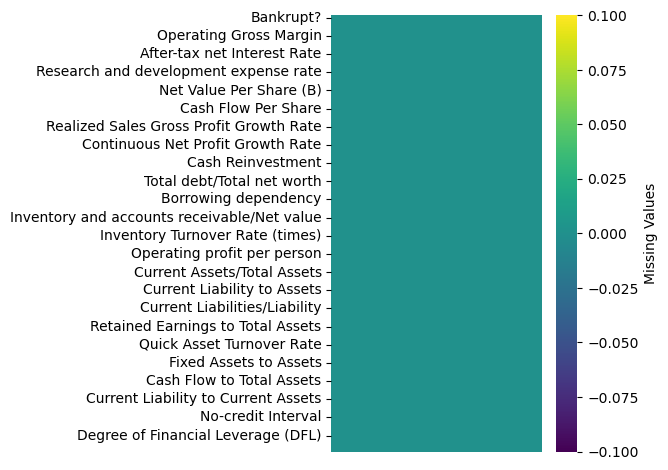



METHOD 2




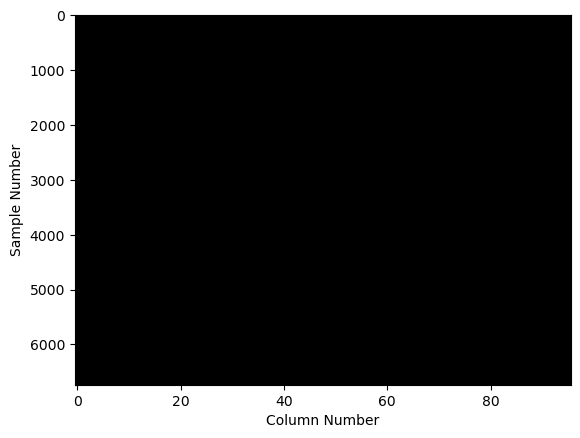

In [10]:
profiler.visualizeNull(data)

In [11]:
profiler.nullData(data)

DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


In [12]:
profiler.descriptiveData(data)

QUICK DESCRIPTIVE ANALYSIS :
-------------------------------------------------------------------------------------------------------------


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00,6734.00
mean,0.03,0.51,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,0.78,2004934856.85,1963636308.29,0.47,16207157.71,0.12,0.19,0.19,0.19,0.23,0.32,0.04,0.11,0.18,0.02,0.85,0.69,0.69,0.22,5528198349.12,0.00,0.26,0.38,408375.42,0.01,0.63,0.01,0.11,0.89,0.01,0.37,0.01,0.11,0.18,0.40,0.14,9154143.16,8116721.12,2163462073.06,1011322586.87,0.04,0.04,0.40,10881081.10,0.81,0.40,0.52,0.12,0.01,32000891.01,0.09,0.35,0.28,54060380.17,0.76,0.74,0.33,54770017.83,0.94,0.00,0.03,1200235885.06,2169819872.29,0.59,2484062940.45,0.67,0.25,0.76,0.33,0.12,0.65,0.46,0.59,0.32,0.03,0.00,0.81,1

In [13]:
profiler.uniqueColumn(data)

UNIQUE VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'Bankrupt?' : 2 including NaN values, 2 excluding Nan values

[1 0]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'ROA(C) before interest and depreciation before interest' : 3298 including NaN values, 3298 excluding Nan values

[0.37059426 0.46429094 0.42607127 ... 0.28494126 0.54789646 0.49953688]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'ROA(A) before interest and  after tax' : 3111 including NaN values, 3111 excluding Nan values

[0.42438945 0.53821413 0.49901875 ... 0.49329481 0.6067379  0.6480048 ]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'RO

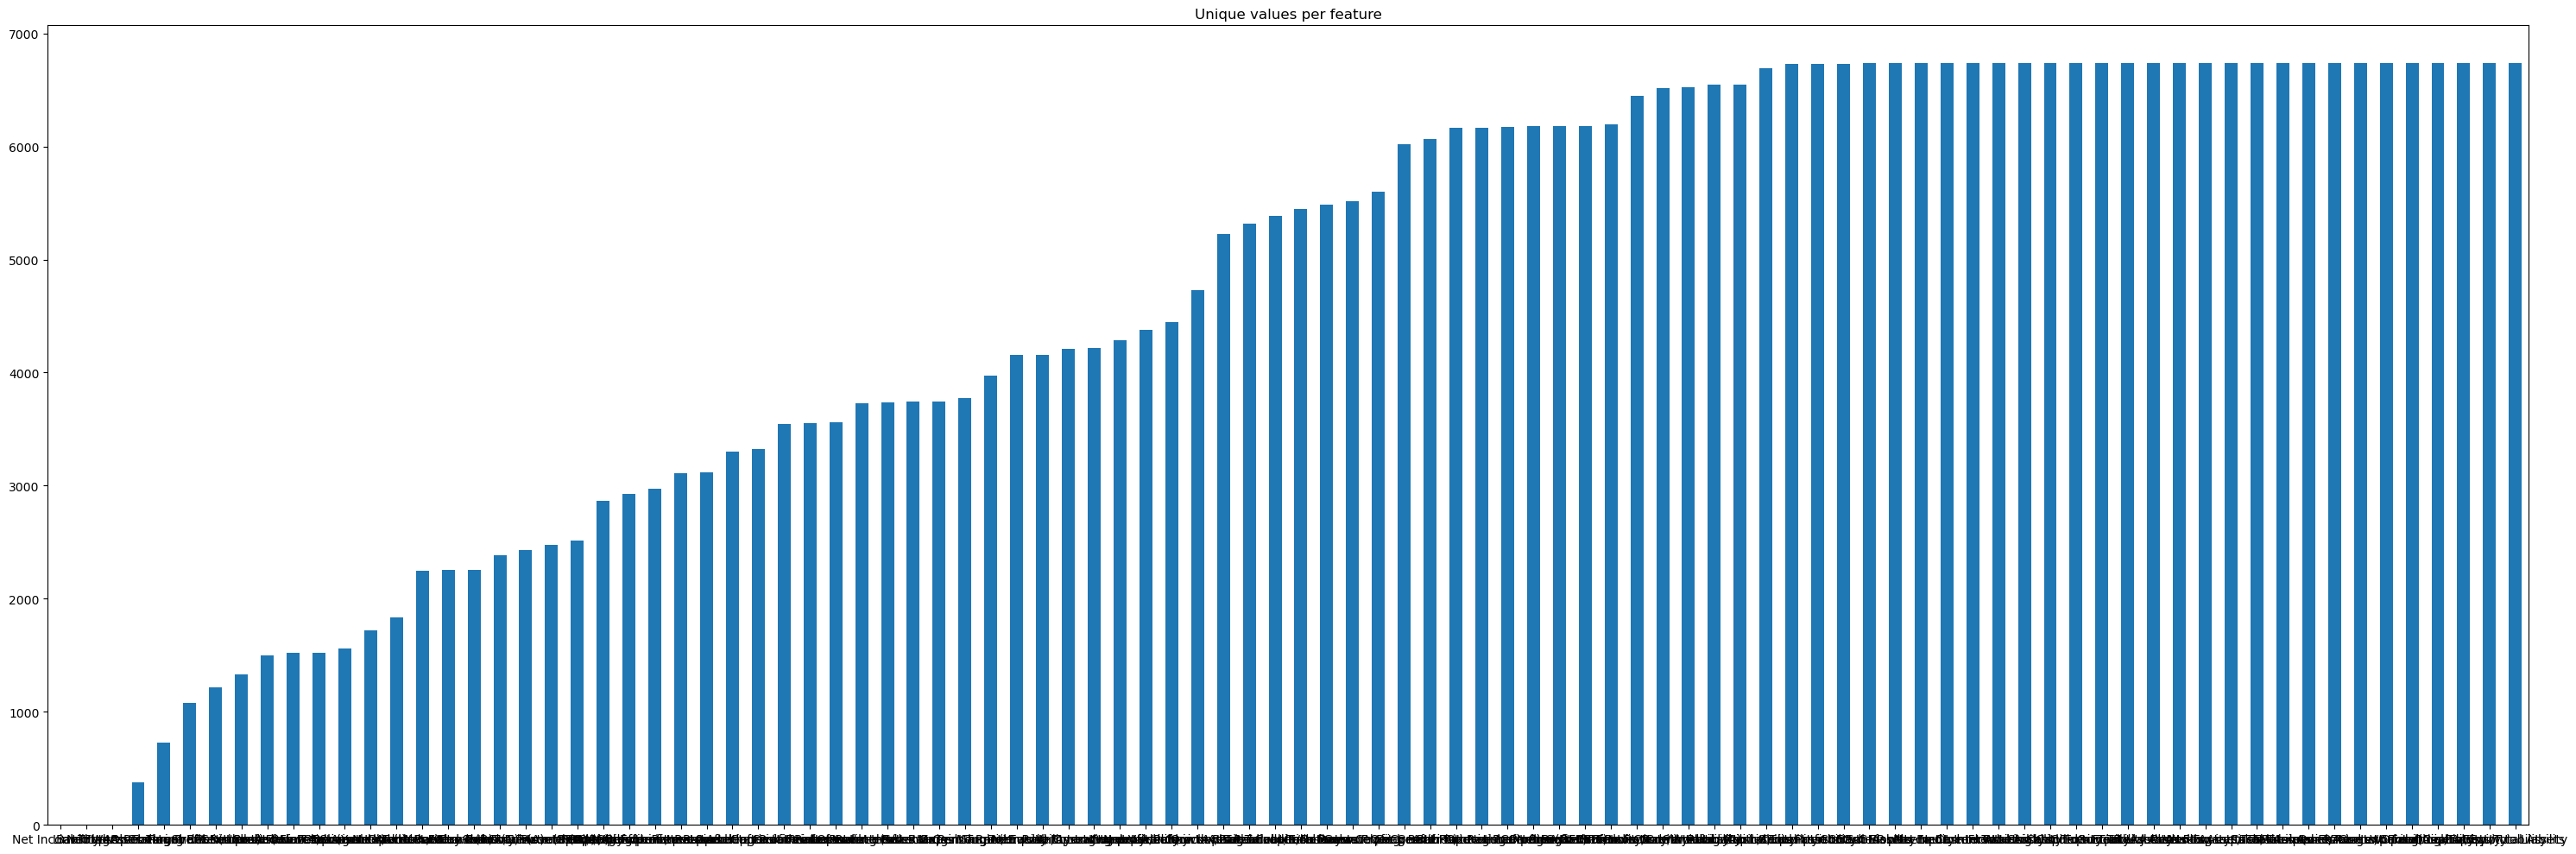

In [14]:
# for each numerical feature compute number of unique entries

unique_values = data.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=False, title="Unique values per feature", figsize=(30,10))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6734 entries, 0 to 6733
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6734 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6734 non-null   float64
 2   ROA(A) before interest and  after tax                    6734 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6734 non-null   float64
 4   Operating Gross Margin                                   6734 non-null   float64
 5   Realized Sales Gross Margin                              6734 non-null   float64
 6   Operating Profit Rate                                    6734 non-null   float64
 7   Pre-tax net Interest Rate                                6734 non-null   float64
 8   After-tax net Interest Rate 

In [16]:
data.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.00,-0.25,-0.27,-0.26,-0.13,-0.13,-0.06,-0.09,-0.09,-0.09,-0.09,-0.00,-0.02,-0.09,-0.02,-0.11,-0.16,-0.16,-0.16,-0.23,-0.09,-0.05,-0.15,-0.21,0.01,-0.05,-0.07,-0.07,-0.07,-0.04,-0.02,-0.07,-0.08,-0.00,-0.10,-0.00,0.26,0.24,-0.24,-0.01,0.27,0.04,-0.15,-0.22,0.14,-0.07,-0.01,-0.01,0.00,0.08,0.00,0.00,-0.09,-0.01,-0.19,-0.08,-0.04,-0.10,-0.10,0.09,0.19,-0.08,-0.00,0.00,-0.02,-0.19,0.22,0.00,-0.24,-0.11,0.14,0.01,0.03,-0.04,-0.02,-0.01,0.07,-0.02,0.22,0.18,-0.07,-0.04,-0.11,-0.08,0.18,0.07,-0.31,0.04,-0.01,-0.13,-0.24,0.24,0.01,-0.00,NaN,-0.11
ROA(C) before interest and depreciation before interest,-0.25,1.00,0.94,0.99,0.42,0.42,0.35,0.38,0.36,0.24,0.37,0.06,0.11,0.41,0.05,0.25,0.51,0.51,0.51,0.83,0.44,0.21,0.75,0.80,0.03,0.09,0.17,0.17,0.12,0.02,0.08,0.34,0.34,0.01,0.14,0.00,-0.24,-0.25,0.25,0.01,-0.26,-0.10,0.75,0.81,-0.16,0.22,-0.04,0.01,-0.07,-0.07,0.05,0.03,0.32,-0.01,0.25,0.19,0.10,0.24,0.12,-0.05,-0.20,0.42,-0.02,0.00,0.06,0.18,-0.22,0.02,0.68,0.44,-0.26,0.01,-0.03,-0.07,-0.03,0.08,-0.01,0.06,-0.22,-0.13,0.27,0.18,0.50,0.26,-0.16,-0.01,0.90,-0.07,0.01,0.42,0.42,-0.24,-0.02,0.01,NaN,0.08
ROA(A) before interest and after tax,-0.27,0.94,1.00,0.95,0.41,0.41,0.36,0.41,0.41,0.30,0.39,0.07,0.08,0.36,0.05,0.23,0.54,0.54,0.54,0.82,0.38,0.23,0.73,0.81,0.03,0.12,0.20,0.20,0.12,0.02,0.08,0.36,0.29,0.01,0.14,0.01,-0.

In [17]:
# drop the column 'Net Income Flag' because it just has 1 value: Nan

df = data.drop(columns= ['Net Income Flag'])
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.34,0.60,0.00,0.01,534000000

In [18]:
# drop unescessary columns.

corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Columns to drop: {to_drop}")
print(f"Number of columns to drop; {len(to_drop)}")

df.drop(to_drop, axis=1, inplace=True)
display(df)

Columns to drop: ['ROA(A) before interest and  after tax', 'ROA(B) before interest and depreciation after tax', 'Realized Sales Gross Margin', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Continuous interest rate (after tax)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Regular Net Profit Growth Rate', 'Net worth/Assets', 'Borrowing dependency', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'Net Worth Turnover Rate (times)', 'Quick Assets/Current Liability', 'Operating Funds to Liability', 'Current Liabilities/Equity', 'Current Liability to Liability', 'Current Liability to Equity', 'CFO to Assets', 'Cash Flow to Equity', 'Net Income to Total Assets', 'Gross Profit to Sales', 'Liability to Equity']
Number of columns to drop; 26


,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio,Long-term fund suitability ratio (A),Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Cash/Current Liability,Current Liability to Assets,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.37,0.60,1.00,0.30,0.00,0.00,0.46,0.00,0.00,0.15,0.17,0.31,0.02,0.02,0.85,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.01,0.01,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.15,0.28,0.00,0.68,0.72,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.13,0.64,0.46,0.12,0,0.01,0.62,0.83,0.03,0.56,0.02
1,1,0.46,0.61,1.00,0.30,0.00,0.00,0.46,0.00,0.00,0.18,0.21,0.32,0.02,0.02,0.85,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.01,0.01,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.06,0.29,0.01,0.31,0.73,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.12,0.64,0.46,0.05,0,0.01,0.62,0.84,0.26,0.57,0.02
2,1,0.43,0.60,1.00,0.30,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.31,0.01,0.02,0.85,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.01,0.01,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.03,0.38,0.14,0.83,0.34,0.60,0.00,5340000000.00,0.10,0.28,0.01,0.45,0.74,0.00,0.91,0.00,0.02,0.00,0.00,0.59,761000000.00,0.67,0.28,0.12,0.64,0.46,0.03,0,0.04,0.62,0.84,0.03,0.56,0.02
3,1,0.40,0.58,1.00,0.30,0.00,0.00,0.47,0.00,0.00,0.15,0.19,0.32,0.01,0.02,0.85,0.69,0.22,4880000000.00,0.00,0.26,0.38,0.00,0.00,0.63,0.01,0.15,0.01,0.01,0.40,0.09,0.00,0.00,7130000000.00,9150000000.00,0.02,0.38,0.02,0.73,0.16,0.23,0.02,0.00,0.10,0.28,0.00,0.62,0.73,0.02,0.91,0.00,0.02,8140000000.00,6050000000.00,0.59,2030000000.00,0.67,0.56,0.12,0.58,0.45,0.07,0,0.00,0.62,0.83,0.03,0.56,0.02
4,1,0.47,0.60,1.00,0.30,7890000000.00,0.00,0.46,0.00,0.00,0.17,0.21,0.32,0.03,0.02,0.85,0.69,0.22,5510000000.00,0.00,0.27,0.38,0.01,0.00,0.64,0.01,0.11,0.01,0.01,0.40,0.18,0.00,0.00,0.00,0.00,0.06,0.39,0.02,0.75,0.26,0.36,0.01,0.00,0.11,0.29,0.00,0.98,0.73,0.00,0.91,0.00,0.03,6680000000.00,5050000000.00,0.59,824000000.00,0.67,0.31,0.11,0.62,0.45,0.05,0,0.00,0.62,0.84,0.02,0.58,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_42207/1553987023.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


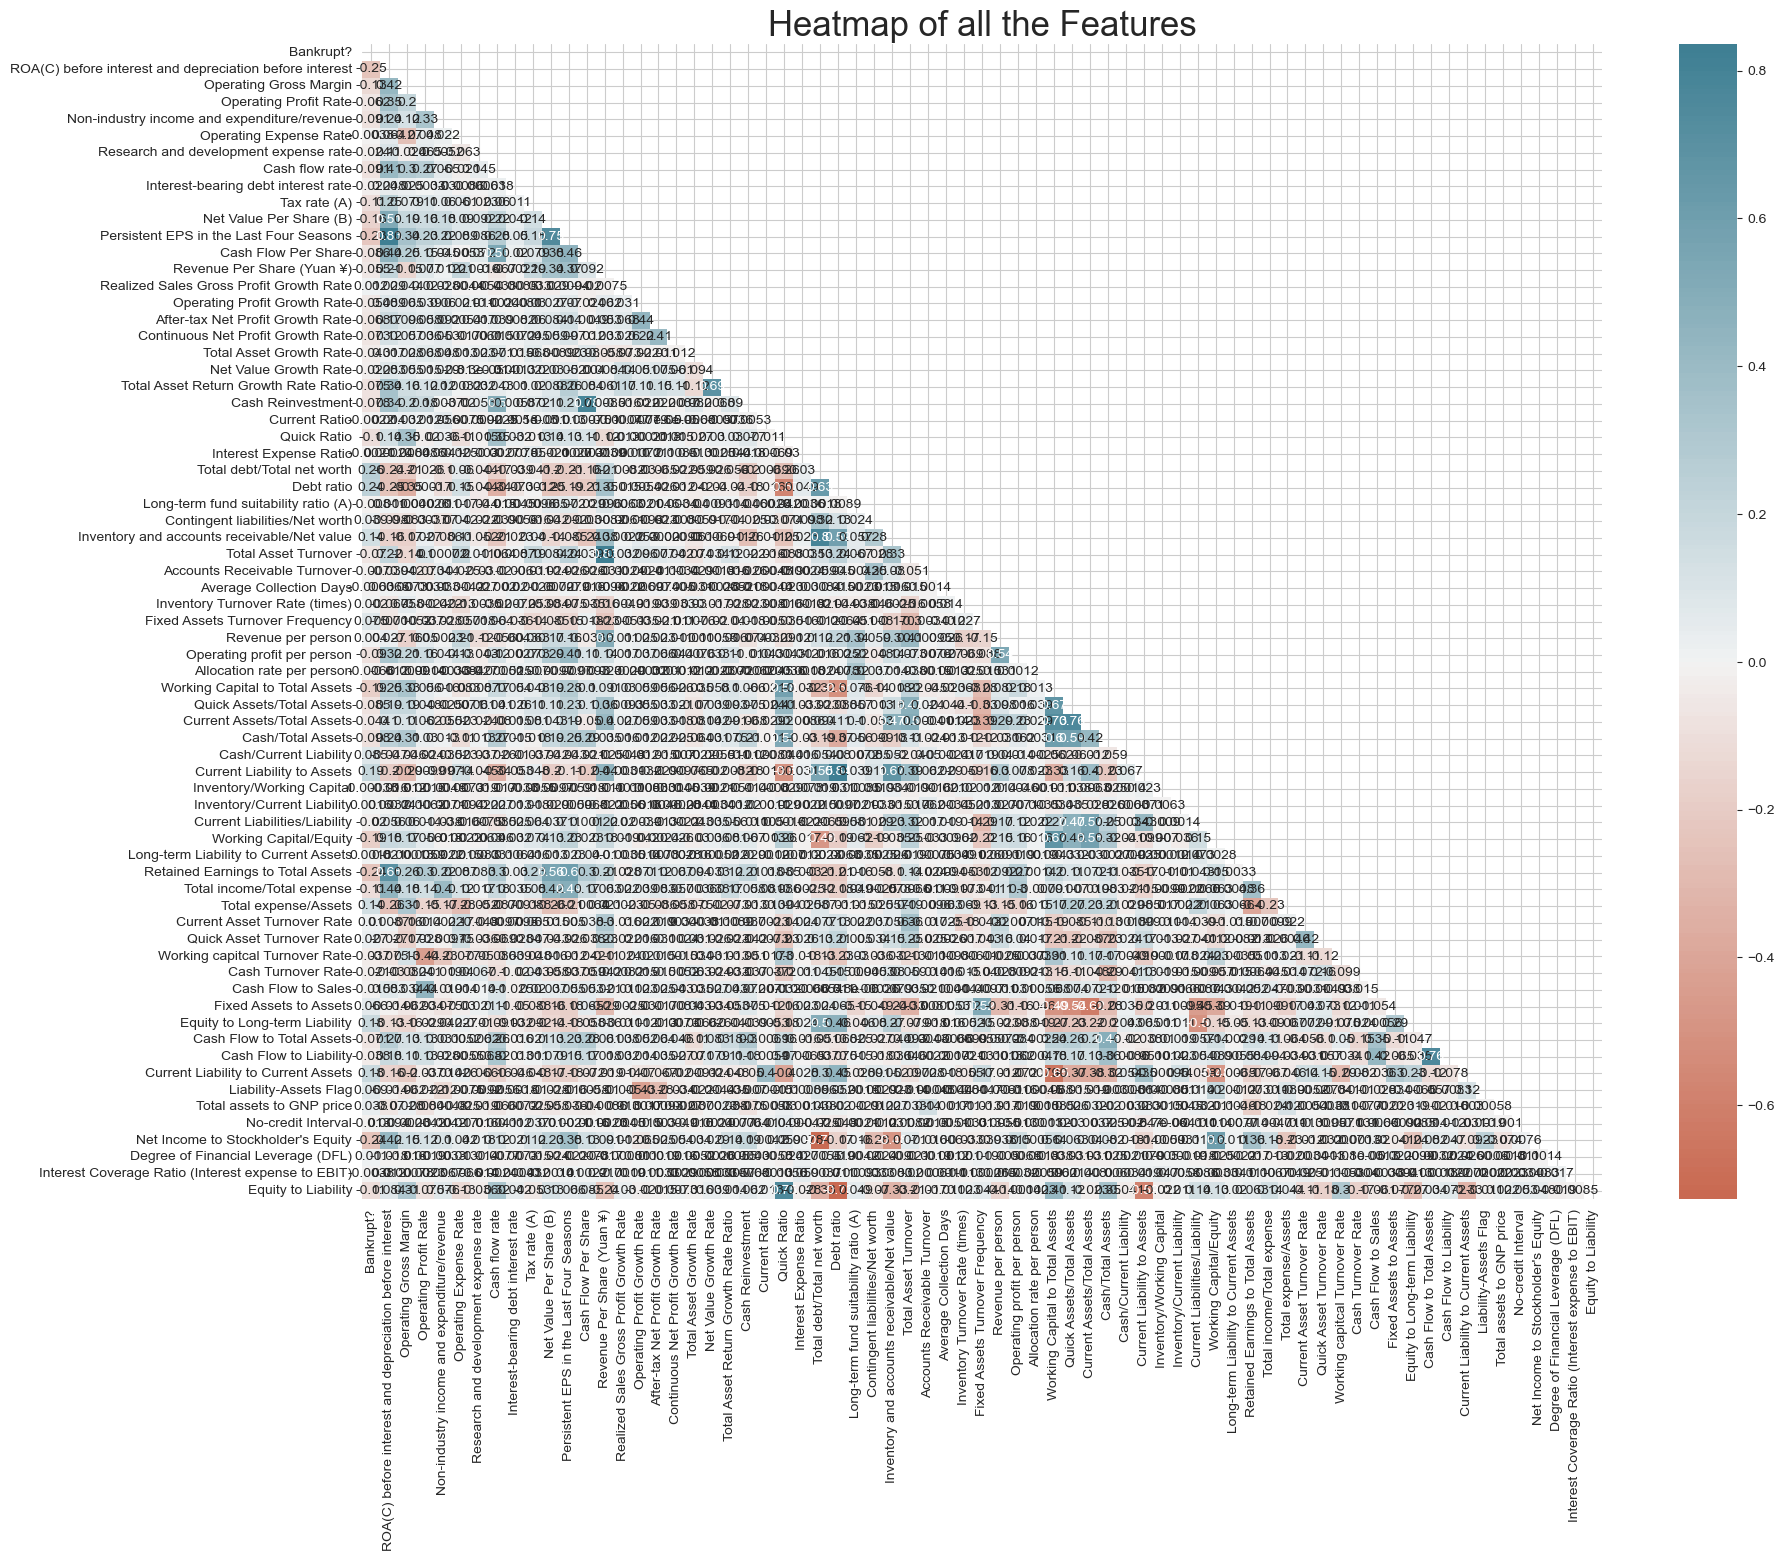

In [61]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (20,15))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );

plt.title("Heatmap of all the Features", fontsize = 25);

<Axes: >

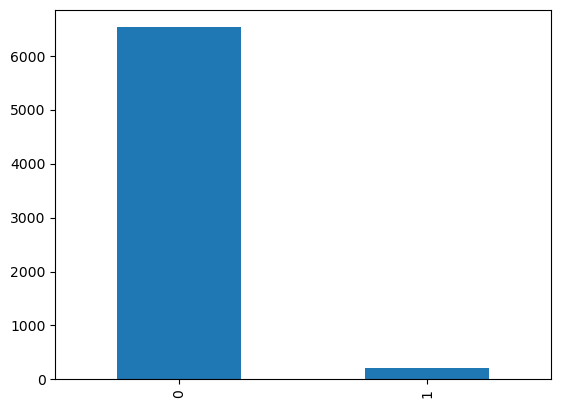

In [19]:
# check the imbalenced data

count_classes = df['Bankrupt?'].value_counts()
count_classes.plot(kind = 'bar')

In [20]:
# handle imbalenced data

from imblearn.over_sampling import SMOTE

X = df.drop('Bankrupt?', axis = 1)
y = df["Bankrupt?"]

y.value_counts()

0    6528
1     206
Name: Bankrupt?, dtype: int64

In [21]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

y_resampled.value_counts()

1    6528
0    6528
Name: Bankrupt?, dtype: int64

In [22]:
# normalize data
# use MinMaxScaler to to perform normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled_normalized = scaler.fit_transform(X_resampled)

# fit_transform method scales the features in X_resampled into range between 0 & 1, ensuring each feature has a similar scale.

In [23]:
# split the data: training & testing subsets
# training set: train the ml model
# testing set: eveluate ml performence on unseen data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_normalized, y_resampled, test_size=0.2, random_state=42)

In [27]:
# train the ml algorithm by RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# generated predicted probabilities: obtain the predicted probabilities from the trained model for the testing set.

y_pred_prod = model.predict_proba(X_test)

In [30]:
# apply probability calibration method to the predicted probilities: platt scaling, isotonic regression & sigmoid calibartion
# use CalibratedClassifierCV to support various calibration techniques.

from sklearn.calibration import CalibratedClassifierCV 

calibration_model = CalibratedClassifierCV(model, method = 'sigmoid', cv= 'prefit') 

#cv prefit assumes that the base model is already trained on the training set

calibration_model.fit(X_train, y_train)

calibration_probs = calibration_model.predict_proba(X_test)

In [34]:
# evaluate the calibrated model:

y_pred = calibration_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9877488514548239
Precision: 0.9792626728110599
Recall: 0.99609375


In [ ]:
# the model's prediction are correct approximately 98.77% of the time on the test set.
# out of the instances in the test set, around 98.77% of them are classified correctly by the model.

(-4.058631209647063, 4.117395258804836, -4.309480492130218, 5.167561533094499)

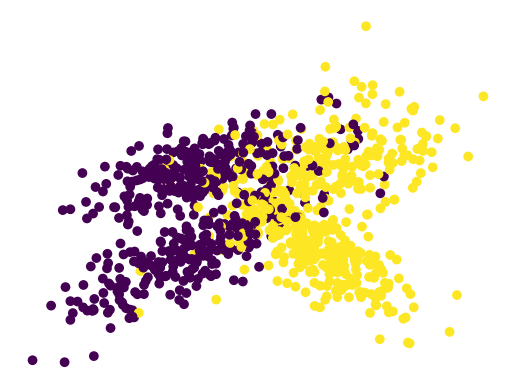

In [37]:
#two-class classification dataset, generated by the make_classification method packaged into sklearn

import numpy as np
from sklearn.datasets import make_classification

np.random.seed(42)
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0)
n_train_samples = 1000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.axis('off')

In [38]:
# compare the Random Forest Classifier with 3 models: Logistic regression, Gaussian Naive Bayes and Linear SVM.

import numpy as np

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [39]:
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic Regression"),
    (gnb, "Gaussian Naive Bayes"),
    (svc, "Linear SVC"),
    (rfc, "Random Forest"),
]

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_42207/1285660794.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Dark2")
/Users/talia/anaconda3/lib/python3.10/site-packages/sklearn/calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]
/Users/talia/anaconda3/lib/python3.10/site-packages/sklearn/calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]
/Users/talia/anaconda3/li

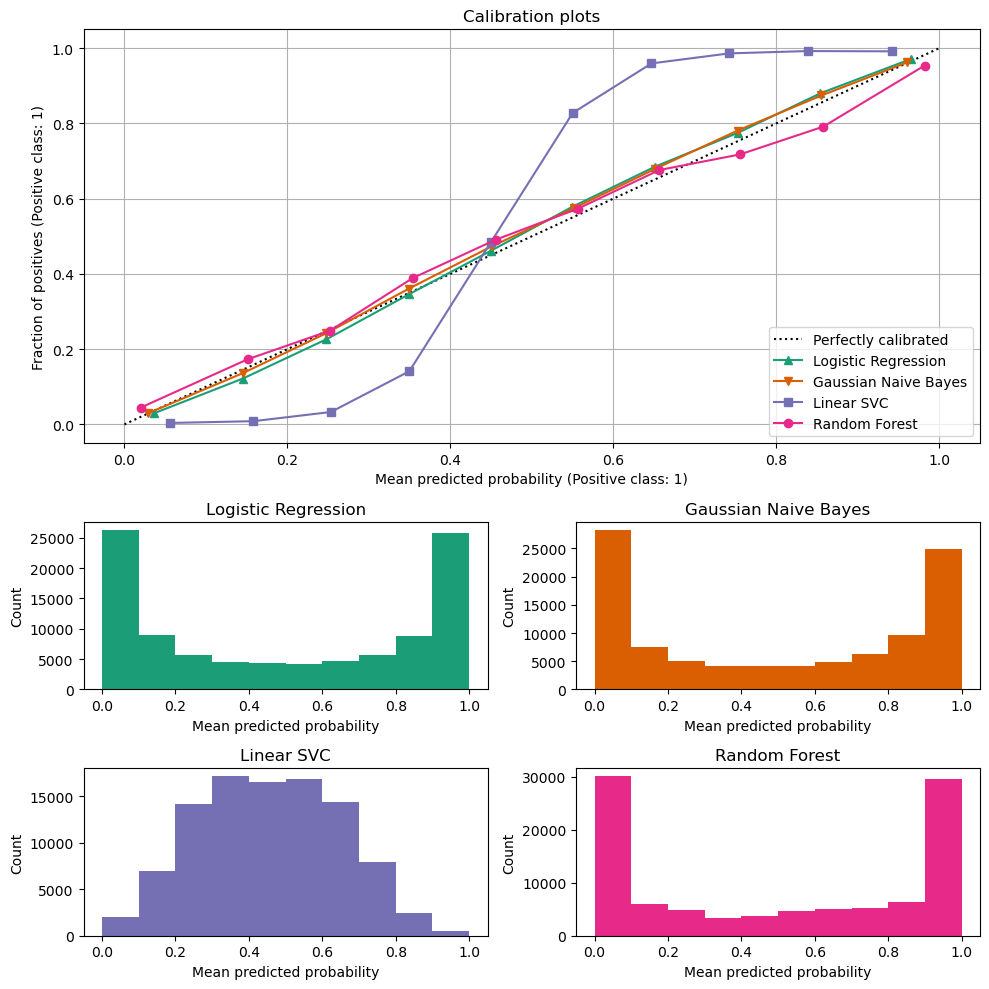

In [40]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [45]:
# HistGradientBoostingClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create an instance of HistGradientBoostingClassifier
model2 = HistGradientBoostingClassifier()

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))

[[41059  3940]
 [ 5102 39899]]


In [ ]:
# [true negative.  false positive]
# [false negave.   true positive]

#True Positive (TP): The model correctly predicted the bankruptcy as positive.
#True Negative (TN): The model correctly predicted the non-bankruptcy as negative.
#False Positive (FP): The model incorrectly predicted the non-bankruptcy as positive.
#False Negative (FN): The model incorrectly predicted the bankruptcy as negative.

[[41059  3940]
 [ 5102 39899]]


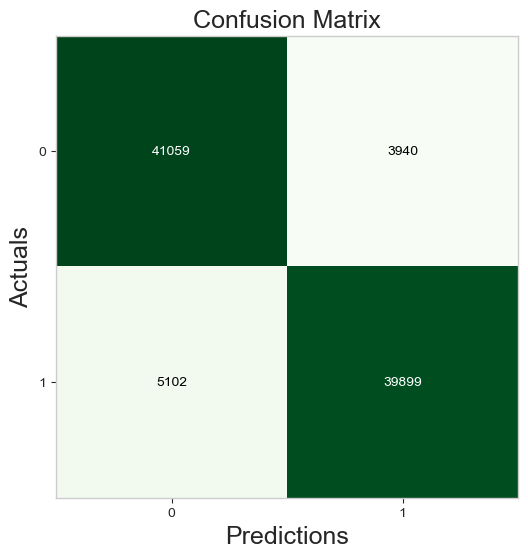

Accuracy of hgb: 90.22 %
SD of hgb: 1.02 %
Best Accuracy of HGB: 90.01 %
Best Parameter of HGB: {'l2_regularization': 1.5, 'learning_rate': 0.1, 'max_depth': 25, 'max_iter': 1200, 'scoring': 'f1_micro'}


In [66]:
#histogram boosting gradient classifer
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_classifier = HistGradientBoostingClassifier()
hgb_classifier.fit(X_train,y_train)
y_pred_hgb = hgb_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm_hgb = confusion_matrix(y_test, y_pred_hgb)
print(cm_hgb)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_hgb, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
from sklearn.model_selection import cross_val_score
accuracy_score(y_test, y_pred_hgb)
roc_auc_score(y_test, y_pred_hgb)
acc_hgb = cross_val_score(estimator = hgb_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy of hgb: {:.2f} %".format(acc_hgb.mean()*100))
print("SD of hgb: {:.2f} %".format(acc_hgb.std()*100))
#print(metrics.classification_report(y_test, y_pred_hgb))
from sklearn.model_selection import GridSearchCV
parameters_hgb = [{'max_iter': [1000,1200,1500],
                'learning_rate': [0.1],
                'max_depth' : [25, 50, 75],
                'l2_regularization': [1.5],
                'scoring': ['f1_micro']}]
grid_search_hgb = GridSearchCV(estimator = hgb_classifier,
                           param_grid = parameters_hgb,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_hgb.fit(X_train, y_train)
best_accuracy_hgb = grid_search_hgb.best_score_
best_paramaeter_hgb = grid_search_hgb.best_params_  
print("Best Accuracy of HGB: {:.2f} %".format(best_accuracy_hgb.mean()*100))
print("Best Parameter of HGB:", best_paramaeter_hgb)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     44999
           1       0.91      0.89      0.90     45001

    accuracy                           0.90     90000
   macro avg       0.90      0.90      0.90     90000
weighted avg       0.90      0.90      0.90     90000



In [ ]:
#Precision: The ability of the model to correctly predict the bankruptcy. It is calculated as TP / (TP + FP).
#Recall: The proportion of positive instances that are correctly predicted by the model. It is calculated as TP / (TP + FN).
#F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics.
#Support: The number of occurrences of each class in the test set.
#Accuracy: The overall accuracy of the model in predicting the correct class labels.
#Macro avg: The average of precision, recall, and F1-score across classes, giving equal weight to each class.
#Weighted avg: The average of precision, recall, and F1-score weighted by the number of samples in each class.

In [54]:
# Hyperparameter tuning refers to the process of finding the optimal set of hyperparameters for a machine learning model
# one commonly used method is grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'max_iter': [100, 200, 300],
    'l2_regularization': [0.0, 0.1, 0.01]
}

model = HistGradientBoostingClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 100}


In [57]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=10, population_size=50, random_state=42, verbosity=2)

tpot.fit(X_train, y_train)

y_pred = tpot.predict(X_test)

tpot.score(X_test, y_test)


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.906

Generation 2 - Current best internal CV score: 0.906

Generation 3 - Current best internal CV score: 0.906

Generation 4 - Current best internal CV score: 0.9064

Generation 5 - Current best internal CV score: 0.9064

Generation 6 - Current best internal CV score: 0.9067000000000001

Generation 7 - Current best internal CV score: 0.9074

Generation 8 - Current best internal CV score: 0.9074

Generation 9 - Current best internal CV score: 0.9074

Generation 10 - Current best internal CV score: 0.9074

Best pipeline: ExtraTreesClassifier(BernoulliNB(BernoulliNB(RFE(input_matrix, criterion=entropy, max_features=0.30000000000000004, n_estimators=100, step=0.25), alpha=0.001, fit_prior=False), alpha=0.01, fit_prior=False), bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=19, min_samples_split=17, n_estimators=100)


0.9030555555555555